<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/multiplication_pattern/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,85.702895,32.150929,44.189770,-0.001318,172.042277,172.043558,-0.001281
1,0.0,1.0,67.309533,82.874177,95.025726,-0.000459,255.208977,255.209530,-0.000552
2,0.0,2.0,30.187321,80.941246,44.118011,0.000300,165.246879,165.246474,0.000404
3,0.0,3.0,35.506111,62.673810,65.977148,-0.000214,174.156854,174.157072,-0.000218
4,0.0,4.0,62.012200,78.019599,46.282723,0.000065,196.314588,196.314433,0.000154
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,37.914542,54.618751,94.217801,0.000022,196.751116,196.750990,0.000127
119996,999.0,116.0,99.936985,55.211995,67.622273,-0.000293,232.770961,232.771173,-0.000213
119997,999.0,117.0,93.071695,94.273509,81.600334,0.000065,278.945603,278.945543,0.000060
119998,999.0,118.0,91.934292,96.800231,28.748465,0.000101,227.483089,227.483032,0.000057


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,85.702895,32.150929,44.189770,-0.001318,172.042277,172.043558,-0.001281
1,0.0,1.0,67.309533,82.874177,95.025726,-0.000459,255.208977,255.209530,-0.000552
2,0.0,2.0,30.187321,80.941246,44.118011,0.000300,165.246879,165.246474,0.000404
3,0.0,3.0,35.506111,62.673810,65.977148,-0.000214,174.156854,174.157072,-0.000218
4,0.0,4.0,62.012200,78.019599,46.282723,0.000065,196.314588,196.314433,0.000154
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,37.914542,54.618751,94.217801,0.000022,196.751116,196.750990,0.000127
119996,999.0,116.0,99.936985,55.211995,67.622273,-0.000293,232.770961,232.771173,-0.000213
119997,999.0,117.0,93.071695,94.273509,81.600334,0.000065,278.945603,278.945543,0.000060
119998,999.0,118.0,91.934292,96.800231,28.748465,0.000101,227.483089,227.483032,0.000057


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    85.702895  32.150929  44.189770  ...  172.042277  172.043558 -0.001281
      1.0    67.309533  82.874177  95.025726  ...  255.208977  255.209530 -0.000552
      2.0    30.187321  80.941246  44.118011  ...  165.246879  165.246474  0.000404
      3.0    35.506111  62.673810  65.977148  ...  174.156854  174.157072 -0.000218
      4.0    62.012200  78.019599  46.282723  ...  196.314588  196.314433  0.000154
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  37.914542  54.618751  94.217801  ...  196.751116  196.750990  0.000127
      116.0  99.936985  55.211995  67.622273  ...  232.770961  232.771173 -0.000213
      117.0  93.071695  94.273509  81.600334  ...  278.945603  278.945543  0.000060
      118.0  91.934292  96.800231  28.748465  ...  227.483089  227.483032  0.000057
      119.0  87.879499  99.861400  57.692993  ...  255.433855  255.433925 -0.000070

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    85.702895  32.150929  44.189770  ...  172.042277  172.043558 -0.001281
      1.0    67.309533  82.874177  95.025726  ...  255.208977  255.209530 -0.000552
      2.0    30.187321  80.941246  44.118011  ...  165.246879  165.246474  0.000404
      3.0    35.506111  62.673810  65.977148  ...  174.156854  174.157072 -0.000218
      4.0    62.012200  78.019599  46.282723  ...  196.314588  196.314433  0.000154
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  37.914542  54.618751  94.217801  ...  196.751116  196.750990  0.000127
      116.0  99.936985  55.211995  67.622273  ...  232.770961  232.771173 -0.000213
      117.0  93.071695  94.273509  81.600334  ...  278.945603  278.945543  0.000060
      118.0  91.934292  96.800231  28.748465  ...  227.483089  227.483032  0.000057
      119.0  87.879499  99.861400  57.692993  ...  255.433855  255.433925 -0.000070

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,85.702895,32.150929,44.189770,-0.001318,172.042277,172.043558,-0.001281
1,0.0,1.0,67.309533,82.874177,95.025726,-0.000459,255.208977,255.209530,-0.000552
2,0.0,2.0,30.187321,80.941246,44.118011,0.000300,165.246879,165.246474,0.000404
3,0.0,3.0,35.506111,62.673810,65.977148,-0.000214,174.156854,174.157072,-0.000218
4,0.0,4.0,62.012200,78.019599,46.282723,0.000065,196.314588,196.314433,0.000154
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,37.914542,54.618751,94.217801,0.000022,196.751116,196.750990,0.000127
119996,999.0,116.0,99.936985,55.211995,67.622273,-0.000293,232.770961,232.771173,-0.000213
119997,999.0,117.0,93.071695,94.273509,81.600334,0.000065,278.945603,278.945543,0.000060
119998,999.0,118.0,91.934292,96.800231,28.748465,0.000101,227.483089,227.483032,0.000057


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    85.702895  32.150929  44.189770  ...  172.042277  172.043558 -0.001281
      1.0    67.309533  82.874177  95.025726  ...  255.208977  255.209530 -0.000552
      2.0    30.187321  80.941246  44.118011  ...  165.246879  165.246474  0.000404
      3.0    35.506111  62.673810  65.977148  ...  174.156854  174.157072 -0.000218
      4.0    62.012200  78.019599  46.282723  ...  196.314588  196.314433  0.000154
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  37.914542  54.618751  94.217801  ...  196.751116  196.750990  0.000127
      116.0  99.936985  55.211995  67.622273  ...  232.770961  232.771173 -0.000213
      117.0  93.071695  94.273509  81.600334  ...  278.945603  278.945543  0.000060
      118.0  91.934292  96.800231  28.748465  ...  227.483089  227.483032  0.000057
      119.0  87.879499  99.861400  57.692993  ...  255.433855  255.433925 -0.000070

[120000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

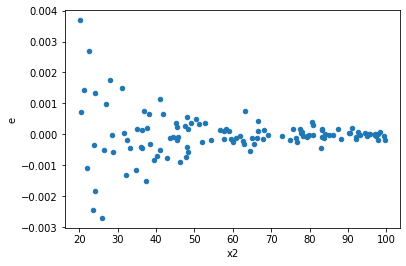

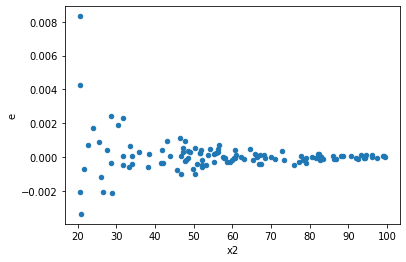

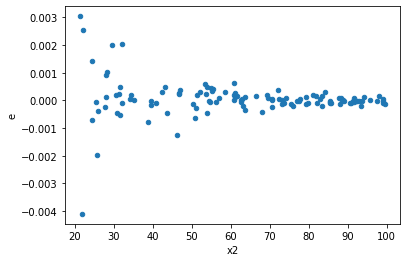

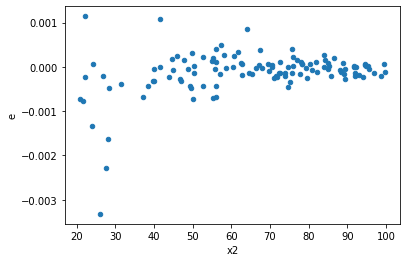

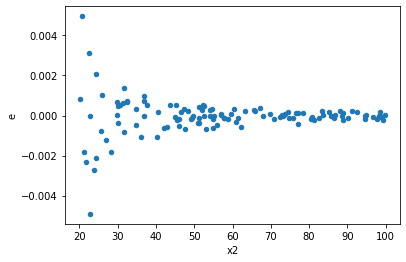

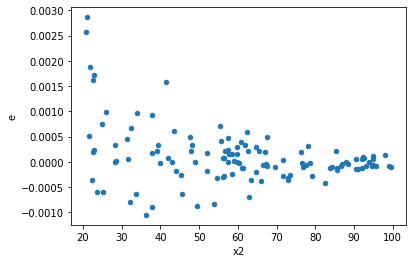

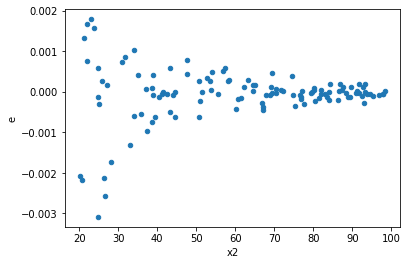

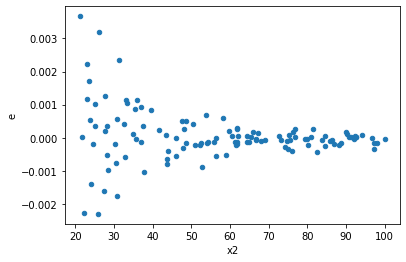

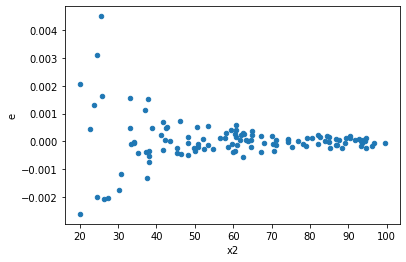

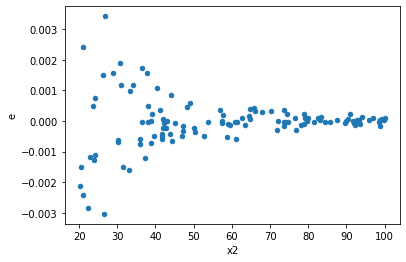

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,9.070298447441242e-07,5.778739013094988e-05,2.061431465327555e-08,1.3133497757034063e-06,0.01569598216304175,5.409807537325029e-29,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,1.3562239815888915e-06,0.00012746805524471144,3.082327230883844e-08,2.8970012555616235e-06,0.01063971658613,1.0646384601775458e-32,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,5.384044379273199e-07,4.292767135013186e-05,1.223646449834818e-08,9.756288943211786e-07,0.0125421300758646,3.976088542867756e-31,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,1.130520378148357e-06,1.7930174239380644e-05,2.5693644957917204e-08,4.075039599859237e-07,0.06305127675030381,2.9489347384205244e-16,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,1.516271406106163e-06,0.00010114423689184972,3.4460713775140064e-08,2.298732656632948e-06,0.0149911794552117,1.9825648388022647e-29,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,1.5016974109389886e-06,2.907589333140946e-05,3.4129486612249745e-08,6.608157575320331e-07,0.051647507226089885,5.266534377406501e-18,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,9.230376259211823e-07,4.941420670332532e-05,2.0978127861845054e-08,1.1230501523483026e-06,0.018679600210177342,2.3925540068640545e-27,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,1.1786164613818775e-06,6.398859430293473e-05,2.6786737758679036e-08,1.4542862341576075e-06,0.018419164762427394,1.7637857059751966e-27,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,1.0866454340408534e-06,7.289404081401479e-05,2.4696487137292124e-08,1.6566827457730634e-06,0.014907191615476094,1.7533782791494247e-29,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64